In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
content_image = load_img('TIP.jpg')
style_image1 = load_img('UKY.jfif')
style_image2 = load_img('PP.jpg')

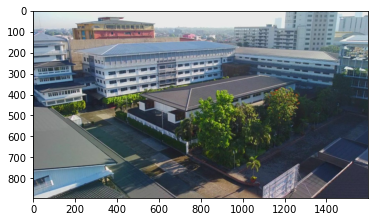

In [5]:
plt.imshow(np.squeeze(content_image))

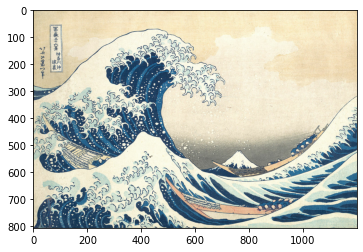

In [6]:
plt.imshow(np.squeeze(style_image1))

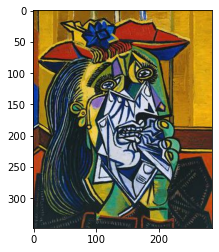

In [7]:
plt.imshow(np.squeeze(style_image2))

In [8]:
stylized_image1 = model(tf.constant(content_image), tf.constant(style_image1))[0]

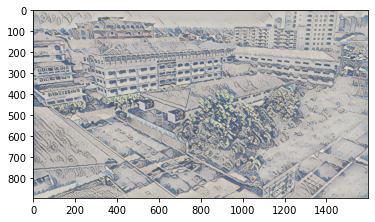

In [9]:
plt.imshow(np.squeeze(stylized_image1))

In [10]:
stylized_image2 = model(tf.constant(content_image), tf.constant(style_image2))[0]

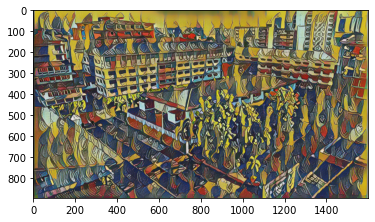

In [11]:
plt.imshow(np.squeeze(stylized_image2))

In [12]:
cv2.imwrite('UKY_image.jpg', cv2.cvtColor(np.squeeze(stylized_image1)*255, cv2.COLOR_BGR2RGB))

True

In [13]:
cv2.imwrite('PP_image.jpg', cv2.cvtColor(np.squeeze(stylized_image2)*255, cv2.COLOR_BGR2RGB))

True